In [152]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [153]:
df = pd.read_csv('./Dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [154]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace = True)

In [155]:
imputer = KNNImputer(n_neighbors=5)
df['Age'] = imputer.fit_transform(df[['Age']])[:, 0]

In [156]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [157]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [158]:
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'port_of_embarkation' column
df['Embarked'] = ordinal_encoder.fit_transform(df[['Embarked']])

# Print the updated DataFrame
print(df)

     PassengerId  Survived  Pclass  Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    1  22.000000      1      0   7.2500   
1              2         1       1    0  38.000000      1      0  71.2833   
2              3         1       3    0  26.000000      0      0   7.9250   
3              4         1       1    0  35.000000      1      0  53.1000   
4              5         0       3    1  35.000000      0      0   8.0500   
..           ...       ...     ...  ...        ...    ...    ...      ...   
886          887         0       2    1  27.000000      0      0  13.0000   
887          888         1       1    0  19.000000      0      0  30.0000   
888          889         0       3    0  29.699118      1      2  23.4500   
889          890         1       1    1  26.000000      0      0  30.0000   
890          891         0       3    1  32.000000      0      0   7.7500   

     Embarked  
0         2.0  
1         0.0  
2         2.0  
3         2

In [159]:
# df.drop(columns=['PassengerId'], inplace = True)

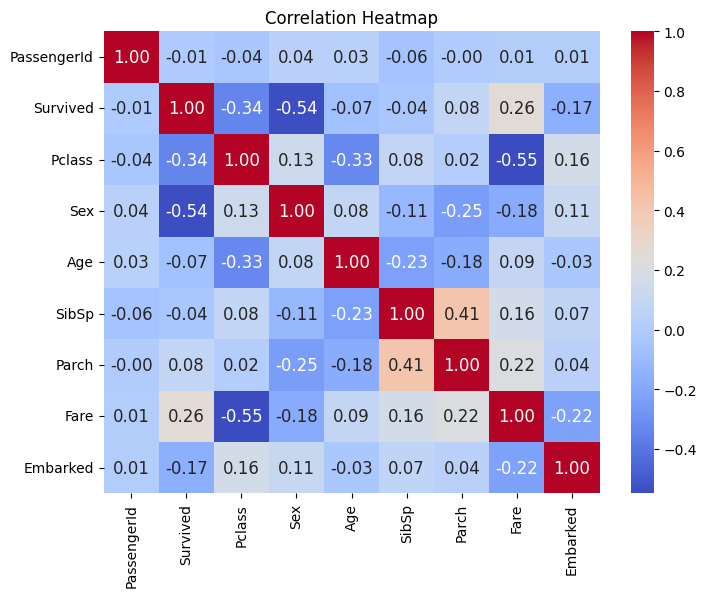

In [160]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

In [161]:
y = df['Survived']
X = df.drop(columns=['Survived'])

In [162]:
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(X)

In [163]:
df_test = pd.read_csv('./Dataset/Test_input.csv')
df_test.drop(columns=['Unnamed: 0'], inplace= True)

In [164]:
df_test['Fare'] = imputer.fit_transform(df_test[['Fare']])[:, 0]

In [171]:
lr = GaussianNB()
lr.fit(X, y)
y_pred = lr.predict(df_test)

In [170]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [167]:
y_df = pd.DataFrame(y_pred)
y_df = y_df.rename(columns={0 : "Survived"})
y_df = y_df.rename_axis('PassengerId')

In [168]:
y_df.to_csv('./Dataset/Output.csv')